# Sort algorithms

I present in this notebook three very classical sort algorithms: Insertion sort, Quick sort and Merge sort.

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from functools import wraps

def check_sorted(L: list):
    for i in range(1, len(L)):
        if L[i] < L[i - 1]:
            return False
    return True

## Insertion Sort

The insertion sort is the most intuitive one, yet not the most efficient. In the best case, the time complexity is $\mathcal{O}(N)$. It happens when the list is already sorted. On the exact opposite, when the list is sorted in decreasing order, this is the worst case, and the time complexity scales as $\mathcal{O}(N^2)$.

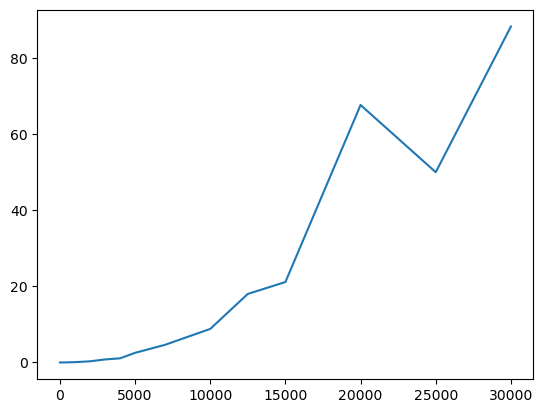

In [ ]:
def timewrapper(f):
    @wraps(f)
    def time_slot(*args, **kwargs):
        import time
        t0 = time.time()
        res = f(*args, **kwargs)
        t1 = time.time()
        return t1 - t0, res
    return time_slot


def swap(L,i,j):
    "Swap i-th and j-th elements of the list L"
    a = L[i]
    L[i] = L[j]
    L[j] = a
    return L

@timewrapper
def insert_sort(L):
    "Sort the list L"
    for i in range(1,len(L)):
        j = i - 1
        while j>= 0 and (L[j] > L[i]):
            L = swap(L, i, j)
            i = j
            j -= 1
    return L

N = [10, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 12500, 15000, 20000, 25000, 30000]
T = []
for n in N:
    L = [np.random.randint(n) for _ in range(n)]
    time_mes, L = insert_sort(L)
    if not check_sorted(L):
        break
    T.append(time_mes)

plt.plot(N,T)

# Tri Rapide

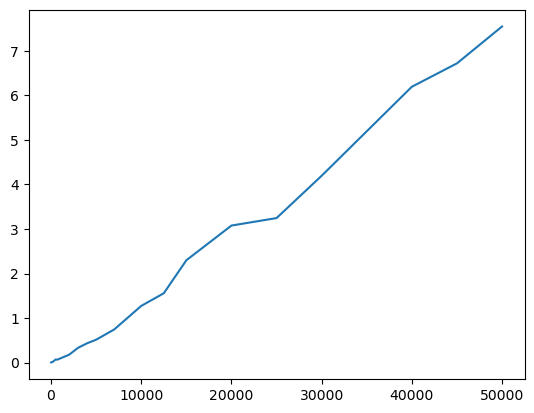

In [159]:
import numpy as np

@timewrapper
def tri_rapide(L):
    if len(L) == 1 or len(L) == 0:
        return L
    pivot = L[0]
    L1 = []
    L2 = []
    for l in L[1:]:
        if l < pivot:
            L1 = np.append(L1,l)
        else:
            L2 = np.append(L2,l)
    _, L1 = tri_rapide(L1)
    _, L2 = tri_rapide(L2)
    return np.concatenate((L1, [pivot], L2), axis = 0)

N = [10, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 12500, 15000, 20000, 25000, 30000, 40000, 45000,50000]
T = []
for n in N:
    L = [np.random.randint(n) for _ in range(n)]
    time_mes, L = tri_rapide(L)
    if not check_sorted(L):
        break
    T.append(time_mes)

plt.plot(N,T)

# Tri fusion

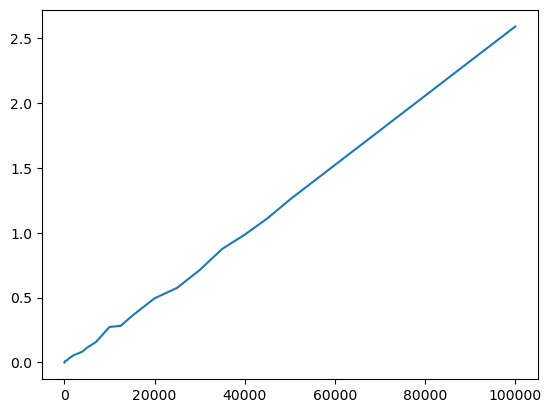

In [182]:
def tri_fusion(L1: list, L2: list):
    i1, i2 = 0, 0
    L = []
    while i1 != len(L1) and i2 != len(L2):
        a = L1[i1]
        b = L2[i2]
        if L1[i1] < L2[i2]:
            L.append(a)
            i1 += 1
        else:
            L.append(b)
            i2 += 1
    if i1 == len(L1):
        J = L2[i2:]
    else:
        J = L1[i1:]
    return np.concatenate((L,J), axis = 0)

@timewrapper
def recur(L):
    if len(L) == 1 or len(L) == 0:
        return L
    split_1, split_2 = np.split(L, indices_or_sections=[len(L)//2])
    return tri_fusion(recur(split_1)[1], recur(split_2)[1])

N = [10, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 12500, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 100000]
T = []
for n in N:
    L = [np.random.randint(n) for _ in range(n)]
    time_mes, L = recur(L)
    if not check_sorted(L):
        print("Warning")
        break
    T.append(time_mes)
plt.plot(N,T)

# Heap Sort

The data structure <code>heap</code> can be represented in two manners: 
1. A list where elements $i$ has two children at $2i$ and $2i+1$, whose value is inferior to that of the parent. Note that for a list of $n$ elements, only the $(n - 1)/2$-th first elements have children.
2. A binary tree.

If we take the point of view of a binary tree, when we heapify the tree, we are guaranteed the largest element is located at the root of the binary tree.

A first function <code>is_heap</code> simply checks that the list is actually heapified.
A second function <code>make_it_heap</code> heapify the tree sequentially, starting from the root and going up, one node at a time. 
Once the tree is heapified, we are guaranted the root's value is the biggest. Then, you can exchange the root and last node of the list, and prune the tree by removing the last element of the list. You heapify the tree once again to have the biggest elements at the root's node and repeat again. You continue until there remains only one element in the list.

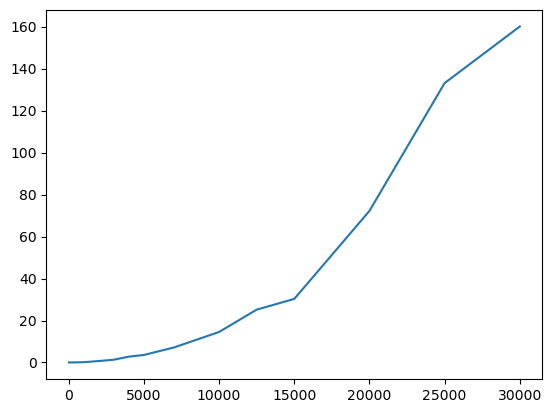

In [ ]:
def is_heap(L: list, order = "decrease"):
    n = len(L)//2
    if order == "decrease":
        for i in range(n):
            if L[2*i + 1] > L[i]:
                return False
            try:
                if L[2*i + 2] > L[i]:
                    return False
            except IndexError:
                pass
    elif order == 'increase':
        for i in range(n):
            if L[2*i + 1] < L[i]:
                return False
            try:
                if L[2*i + 2] < L[i]:
                    return False
            except IndexError:
                pass
    return True

def make_it_heap(heap: list, length: int):
    idx = length - 1
    start = (idx - 1)//2
    while start >= 0:
        browse_tree(heap, start, length)
        start -= 1

def browse_tree(heap: list, root: int, length: int):
    while 2*root < length: #While there is a left child to check, the root is potentially smaller that one of its children.
                                #The goal is to make the children go down one stage at a time.
        child = 2*root

        if child + 1 < length and heap[child + 1] > heap[child]:
            child += 1

        if heap[child] > heap[root]:
            heap[child], heap[root] = heap[root], heap[child]
            root = child
        else:
            return #Because the sub trees are supposed to be heapified, no need to go further

@timewrapper
def heap_sort(heap: list, length: int | None) -> None:
    if length is None:
        length = len(heap)

    make_it_heap(heap, length)
    while length > 1:
        length -= 1
        heap[0], heap[length] = heap[length], heap[0] #Take the smallest element, and put it at the highest node.

        make_it_heap(heap, length)

N = [10, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 12500, 15000, 20000, 25000, 30000]
T = []
for n in N:
    L = [np.random.randint(n) for _ in range(n)]
    time_mes = heap_sort(L, len(L))
    if not check_sorted(L):
        break
    T.append(time_mes)

plt.plot(N,T)